In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.manifold import TSNE
from com.expleague.media_space.topics.file_read_util import FileReadUtil
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline

data = pd.read_csv("output_clusteres.csv")
clusters_centroids_f = FileReadUtil.load_cluster_centroids("/home/tsypia/git/topics/topic_modeling/models/gasparetti/cluster_centroids_filtered.txt")
clusters_centroids_all = FileReadUtil.load_cluster_centroids("/mnt/c/Users/griff/YandexDisk/cs_center/topics/data/models/cluster_centroids_words.txt")

data.head()

,Unnamed: 0,url,timestamp,story_id_predicted,story_id
0,0,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,1.394470e+12,e3a8d589-54c4-4efb-84cf-880fbb2abe6e,ddUyU0VZz0BRneMioxUPQVP6sIxvM
1,1,http://www.moneynews.com/Economy/federal-reser...,1.394470e+12,e3a8d589-54c4-4efb-84cf-880fbb2abe6e,ddUyU0VZz0BRneMioxUPQVP6sIxvM
2,2,http://www.nasdaq.com/article/plosser-fed-may-...,1.394470e+12,e3a8d589-54c4-4efb-84cf-880fbb2abe6e,ddUyU0VZz0BRneMioxUPQVP6sIxvM
3,3,http://www.marketwatch.com/story/feds-plosser-...,1.394470e+12,e3a8d589-54c4-4efb-84cf-880fbb2abe6e,ddUyU0VZz0BRneMioxUPQVP6sIxvM
4,4,http://in.reuters.com/article/2014/03/10/us-ec...,1.394471e+12,e3a8d589-54c4-4efb-84cf-880fbb2abe6e,dPhGU51DcrolUIMxbRm0InaHGA2XM


(145, 100)

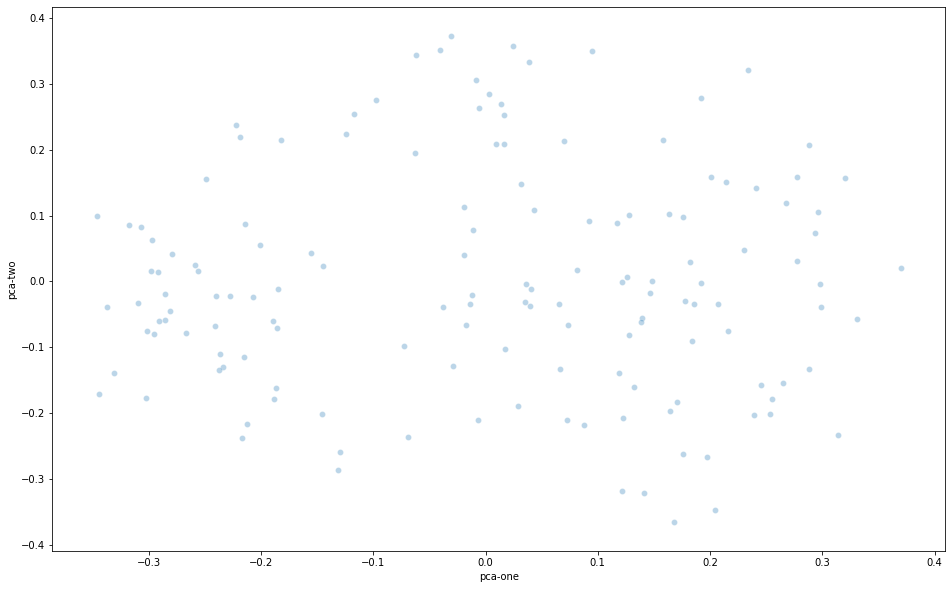

In [58]:
df_cf = pd.DataFrame(clusters_centroids_f)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cf.values)
df_cf['pca-one'] = pca_result[:,0]
df_cf['pca-two'] = pca_result[:,1] 
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)


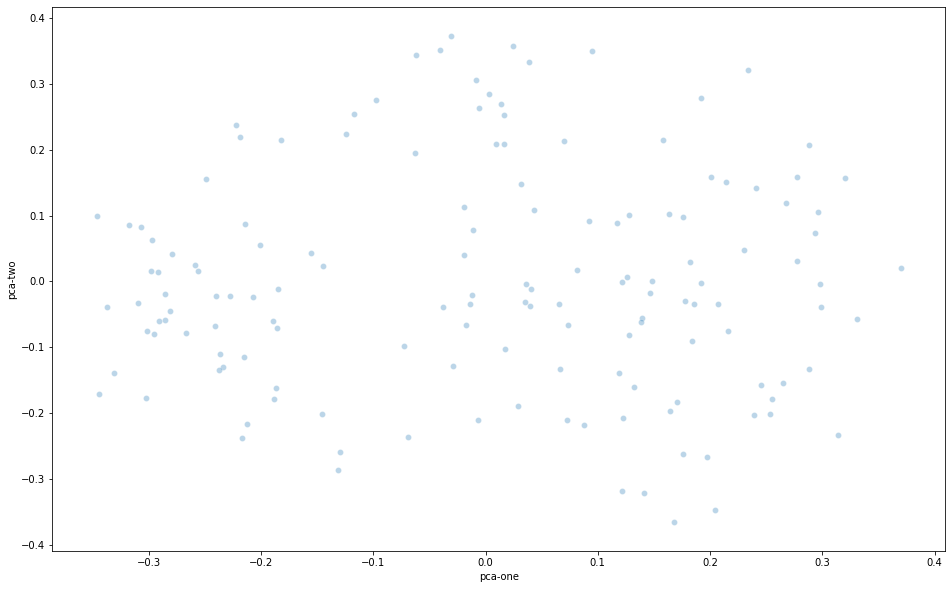

In [59]:
df_all = pd.DataFrame(clusters_centroids_all)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_all.values)
df_all['pca-one'] = pca_result[:,0]
df_all['pca-two'] = pca_result[:,1] 
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

In [12]:

def plot_hist(list_data):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=list_data, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Clusters distribute')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Counter({'drWjpn6_UzSkmiM_9qWYJe3-LIGPM': 234, 'dJQbMcJMikNPqBMYRWteaWPy6-izM': 216, 'dA9GogTJlGEGB9MwV-RlsGpaqj7SM': 172, 'd8bRIS2P12vQAfMQyl607kCwJ9A5M': 165, 'dGA_-1CMxMpz39MQoDUHvFI2_K8pM': 165, 'dtrwBSe3r7m608MhX7j3pXTLfPeAM': 159, 'dCS7hg1b8wkl8mMhX7j3pXTLfPeAM': 156, 'dHmpog6unxaYYaMzYMEdbkeDeB9iM': 152, 'd66XwRjxSJfsCyMklG8EsmZgf5mpM': 141, 'doObUXZT2Ya2BYMPxR-731oH-kj-M': 135, 'dZb2_s9dDbThg9MBPaZNXVQ9XIdYM': 133, 'dxFyQEVc_aPRrBMcwO6A2IeTK7nMM': 132, 'dmIoFKGLr8_YMPMoxy6bGPu4AuaFM': 127, 'dREKpjoyIHKt9bMcbtHapysgkQouM': 126, 'd8WnNUjsPLscpcMvdz_yT-W5XOYcM': 125, 'dUlKgaqxUngrA5MKtr_8lQs0ElRzM': 123, 'dm2XBU7l0ihhp2MpLpXwTSLvMJ7sM': 122, 'dqvpqdCv-IV7KrMD51wr0w-O_QIeM': 112, 'dG4yWVzMejE4yCMBw5kMYeVE-P3yM': 112, 'dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM': 111, 'd6jBBY6fDUHRcZMXLA3qAMmvM7UcM': 111, 'dfQE73yTncYITOMPbxWvh-uzs264M': 110, 'dd-ja3A1HzLxsTMnYm_Zo9l7RZAHM': 109, 'd--MozT4MsoFfIMgKu5_N58OF_f9M': 108, 'dUGqnyCCIa_a8XM3oYqtaQwB6dXJM': 106, 'dQQDUh_eqYkkA5MQTCOY1wWllgFnM': 104, 'dW

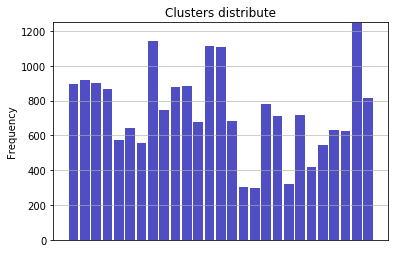

In [22]:
clusters_real = data["story_id"].to_list()
print(Counter(clusters_real))
plot_hist(clusters_real)

Counter({'0': 6953, '640f53f8-6a7f-48cd-9b83-ddca20c39e73': 2506, '17a2a05d-2e76-4428-808b-0d9592c71cd8': 1398, '1290b809-23bd-408f-b2ae-c41d98f208f5': 1398, 'e5074aaf-9832-4b69-a344-66597b5970b2': 1396, '436ee529-588d-4f0d-b7ee-677fd13e7316': 1119, 'c3328fcb-6b66-4ffd-a306-e5cb63e5dea1': 1070, '2db56297-dcd6-4406-ba42-d5de19cc86e8': 978, 'dcfd27a1-2fbd-43c2-936f-514b17783111': 846, '45af5fd9-7c5e-477f-b1e8-7a6c0505ad56': 564, 'e3a8d589-54c4-4efb-84cf-880fbb2abe6e': 508, '2e28873e-562f-49be-92ff-48871c79b084': 185, '706132b3-7431-4275-af48-5177f3b7a5b2': 87, '326bb57a-f71d-42a5-9a71-087f01910152': 79, '66a9533b-3d2f-4452-974e-be243424b96d': 71, '24cec201-9ea6-4d5e-bc72-1f3bc8490704': 49, '63c63749-ed40-4cc2-bf67-4382b3e16536': 49, 'ad5d6a1e-e112-4a23-82ee-a8a520942850': 46, '52163942-7b4a-4622-abfd-dd4cb5fce3a1': 42, 'e307e260-7200-4209-b7f7-72e1a70fb8be': 34, '7db05419-e5ac-4e7e-ac26-b5530366177e': 33, '0442df40-bf6b-4a0e-89f5-68e05e5fc3b8': 32, 'c7da6967-0cad-4ae8-85b4-cb19042fdbdc':

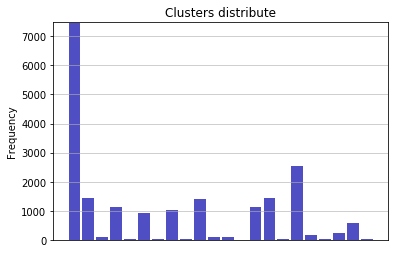

In [63]:
clusters_predicted = data["story_id_predicted"].to_list()
print(Counter(clusters_predicted))
plot_hist(clusters_predicted)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
